In [ ]:
import torch
import torch.nn as nn
from torch.optim import RMSprop
from torchvision import transforms
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [ ]:
batch_size = 512
num_epochs = 300
lr = 0.01

In [ ]:
train_dataset = FashionMNIST(root='./data', train=True,
                             download=True, transform=transforms.ToTensor())
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
test_dataset = FashionMNIST(root='./data', train=False,
                            download=True, transform=transforms.ToTensor())
test_loader = DataLoader(test_dataset, batch_size)

100%|██████████| 26.4M/26.4M [00:01<00:00, 21.7MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 344kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 6.15MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 4.29MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dims, hidden_dims, output_dims):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_dims, hidden_dims)
        self.layer2 = nn.Linear(hidden_dims, hidden_dims)
        self.layer3 = nn.Linear(hidden_dims, hidden_dims)
        self.layer4 = nn.Linear(hidden_dims, hidden_dims)
        self.layer5 = nn.Linear(hidden_dims, hidden_dims)
        self.output = nn.Linear(hidden_dims, output_dims)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = self.sigmoid(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        x = self.layer3(x)
        x = self.sigmoid(x)
        x = self.layer4(x)
        x = self.sigmoid(x)
        x = self.layer5(x)
        x = self.sigmoid(x)
        output = self.output(x)
        return output

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
model = MLP(input_dims=784,
            hidden_dims=128,
            output_dims=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = RMSprop(model.parameters(), lr=lr, alpha=0.99)

In [ ]:
train_losses = []
train_acc = []
val_losses = []
val_acc = []

for epoch in range(num_epochs):
    model.train()
    t_loss = 0
    t_acc = 0
    cnt = 0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        t_loss += loss.item()
        t_acc += (torch.argmax(outputs, 1) == y).sum().item()
        cnt += len(y)
    t_loss /= len(train_loader)
    train_losses.append(t_loss)
    t_acc /= cnt
    train_acc.append(t_acc)

    model.eval()
    v_loss = 0
    v_acc = 0
    cnt = 0
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            loss = criterion(outputs, y)
            v_loss += loss.item()
            v_acc += (torch.argmax(outputs, 1) == y).sum().item()
            cnt += len(y)
        v_loss /= len(test_loader)
        val_losses.append(v_loss)
        v_acc /= cnt
        val_acc.append(v_acc)
    print(f'Epoch {epoch+1}\tTraining Loss: {t_loss:.3f}\tValidation Loss: {v_loss:.3f}')

Epoch 1	Training Loss: 2.392	Validation Loss: 2.303
Epoch 2	Training Loss: 2.190	Validation Loss: 1.707
Epoch 3	Training Loss: 1.269	Validation Loss: 1.047
Epoch 4	Training Loss: 0.916	Validation Loss: 0.845
Epoch 5	Training Loss: 0.708	Validation Loss: 0.753
Epoch 6	Training Loss: 0.591	Validation Loss: 0.701
Epoch 7	Training Loss: 0.509	Validation Loss: 0.637
Epoch 8	Training Loss: 0.474	Validation Loss: 0.576
Epoch 9	Training Loss: 0.434	Validation Loss: 0.576
Epoch 10	Training Loss: 0.417	Validation Loss: 0.509
Epoch 11	Training Loss: 0.401	Validation Loss: 0.517
Epoch 12	Training Loss: 0.376	Validation Loss: 0.595
Epoch 13	Training Loss: 0.373	Validation Loss: 1.376
Epoch 14	Training Loss: 0.377	Validation Loss: 0.547
Epoch 15	Training Loss: 0.351	Validation Loss: 0.549
Epoch 16	Training Loss: 0.338	Validation Loss: 0.411
Epoch 17	Training Loss: 0.335	Validation Loss: 0.409
Epoch 18	Training Loss: 0.327	Validation Loss: 0.499
Epoch 19	Training Loss: 0.319	Validation Loss: 0.389
Ep

Text(0, 0.5, 'Accuracy')

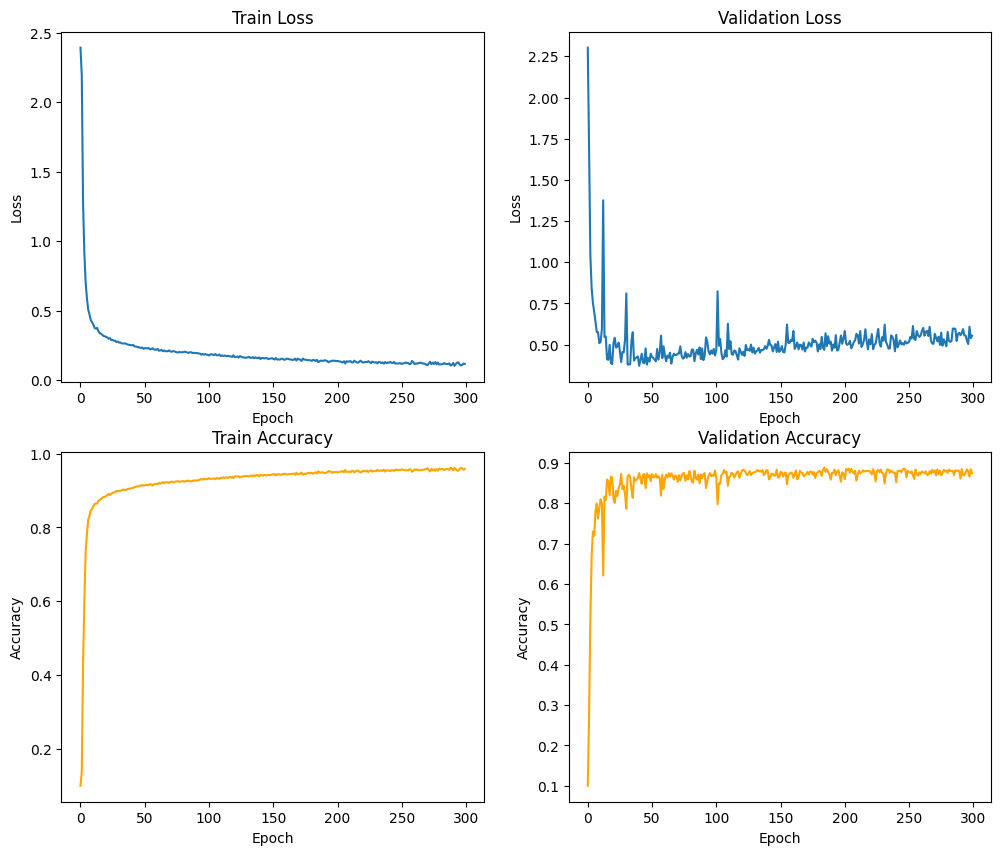

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].plot(train_losses)
ax[0, 0].set_title('Train Loss')
ax[0, 0].set_xlabel('Epoch')
ax[0, 0].set_ylabel('Loss')

ax[0, 1].plot(val_losses)
ax[0, 1].set_title('Validation Loss')
ax[0, 1].set_xlabel('Epoch')
ax[0, 1].set_ylabel('Loss')

ax[1, 0].plot(train_acc, color='orange')
ax[1, 0].set_title('Train Accuracy')
ax[1, 0].set_xlabel('Epoch')
ax[1, 0].set_ylabel('Accuracy')

ax[1, 1].plot(val_acc, color='orange')
ax[1, 1].set_title('Validation Accuracy')
ax[1, 1].set_xlabel('Epoch')
ax[1, 1].set_ylabel('Accuracy')

In [ ]:
test_target = []
test_predict = []
with torch.no_grad():
    for X, y in test_loader:
        X, y = X.to(device), y.to(device)
        outputs = model(X)
        test_target.append(y.cpu())
        test_predict.append(outputs.cpu())

test_predict = torch.cat(test_predict)
test_target = torch.cat(test_target)
acc = (torch.argmax(test_predict, 1) == test_target).sum().item() / len(test_target)
acc

0.8748